In [14]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.pyplot.bar_label
import seaborn as sns;
#import optuna
from scipy import stats
import glob
import random
import datetime
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import os
import pickle
# from  datasist.structdata import detect_outliers
from tqdm import tqdm
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)
from datetime import date,timedelta
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Pre Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Error Metrics
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import plot_confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


#classefication
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
# from sklearn.metrics import plot_confusion_matrix
#clustring
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#pca
from sklearn.decomposition import PCA
#clustring
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings("ignore")

In [15]:
seed = 42
np.random.seed =seed

In [ ]:
#convert data frame to slower case
def lowerCase(x):
    return x.lower()

#check duplicate data
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed . '
    else :
        return 'Data Is clean ,No Duplicate Data Found .'

def get_item_id(x):
    itemname  = df[df['title']==x]
    return itemname['item_id']

# def car_model(x):
#     y   = x.split(' ')[1:]
#     carModel = ' '.join(y)
#     return  carModel

# def getfreq(x):
#     freq = x.split(' ')[-1]
#     return freq

def calc_day_of_birth (day_num):
    today = date.today()
    birthDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthDay

def calc_day_of_employed(day_num):
    today = date.today()
    employedDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    result = 0
    if employedDay > date.today().strftime('%Y-%m-%d') :
         result = 0
    else:
         result = employedDay
    return result

def calculate_age(born):
    born = datetime.datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


def get_appartment(x):
    if x == 'House / apartment' :
       x= x.split(' /')[0]
    return x

def get_ducational_type(x):
    if x == 'Secondary / secondary special' :
       x= x.split(' /')[0]
    return x

def get_label_for_data(x):
    target = ''
    if x in (2,3,4,5) :
       target = 'YES' #risky
    else:
         target = 'NO'  #not risky

    return target
    #draw distplot for all numeric columns just pass numerical column
def all_distplot (numCol):
    plt.figure(1 , figsize = (20 , 6))
    n = 0
    for x in numCol:
        n += 1
        plt.subplot(1 , len(numCol) , n)
        plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
        sns.distplot(df[x] , bins = 20)
        plt.title('Distplot of {}'.format(x))
    plt.show()

def box_plot(df):
    i=1
    plt.figure(figsize = (20,50))
    for col in df.columns:
        plt.subplot(round(len(df.columns)/3),3,i)
        sns.boxplot(x = df[col], data = df,width = 0.5, fliersize = 3, linewidth = 1)
        i+=1

def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

def plot_feature_importance (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.coef_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()
def plot_feature_importance_2 (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.feature_importances_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept
def average_plotting(df,col,output,number,title):
    data_list = df[col].value_counts().index[:number].tolist()
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")
    plt.xticks(rotation=45);
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()
def draw_unique_value (df,title):
    plt.figure(figsize=(10,5))
    plt.title(title)
    unique_counts = df.nunique().to_dict()
    ax = sns.barplot(list(unique_counts.keys()), list(unique_counts.values()),palette='flare')
    ax.bar_label(ax.containers[0])
    plt.plot()

In [ ]:
titles = pd.read_csv('movies.csv')
titles.head(10)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children  
8                                       Action  
9                    Action|Adventure|Thriller

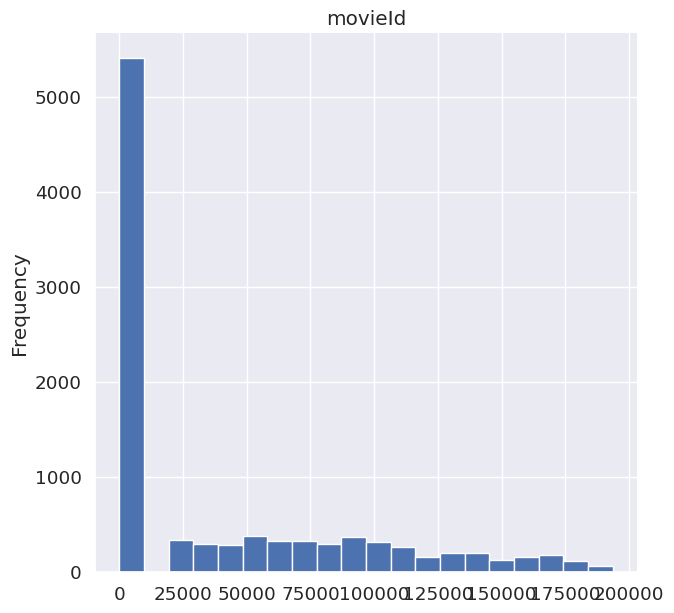

In [ ]:
# @title movieId

from matplotlib import pyplot as plt
titles['movieId'].plot(kind='hist', bins=20, title='movieId')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#read rating file
ratings = pd.read_csv('ratings.csv')

In [ ]:
print("The number of rows in  Rating Dataset is {} , \nThe number of columns in  data is {}".format(ratings.shape[0], ratings.shape[1]))
print("The number of rows in  movies data is {} , \nThe number of columns in  data is {}".format(titles.shape[0], titles.shape[1]))

The number of rows in  Rating Dataset is 100836 , 
The number of columns in  data is 4
The number of rows in  movies data is 9742 , 
The number of columns in  data is 3


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [16]:
#mergind data tables
df = pd.merge(ratings,titles,on='movieId')
df= df.drop(['timestamp'], axis=1)
df

userId  movieId  rating                             title  \
0            1        1     4.0                  Toy Story (1995)   
1            5        1     4.0                  Toy Story (1995)   
2            7        1     4.5                  Toy Story (1995)   
3           15        1     2.5                  Toy Story (1995)   
4           17        1     4.5                  Toy Story (1995)   
...        ...      ...     ...                               ...   
100831     610   160341     2.5                  Bloodmoon (1997)   
100832     610   160527     4.5  Sympathy for the Underdog (1971)   
100833     610   160836     3.0                     Hazard (2005)   
100834     610   163937     3.5                Blair Witch (2016)   
100835     610   163981     3.5                         31 (2016)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1       Adventure|Animation|Children|Comedy|Fantasy  
2       Adventure|Animation|Children|Comedy|Fantasy  
3       Adventure|Animation|Children|Comedy|Fantasy  
4       Adventure|Animation|Children|Comedy|Fantasy  
...                                             ...  
100831                              Action|Thriller  
100832                           Action|Crime|Drama  
100833                        Action|Drama|Thriller  
100834                              Horror|Thriller  
100835                                       Horror  

[100836 rows x 5 columns]

In [17]:
#get numerical column
numCol  = [col for col in df.columns if  df[col].dtype != "O"]
numCol

['userId', 'movieId', 'rating']

In [18]:
#get categorical column
catColumn  = [col for col in df.columns if  df[col].dtype == "O"]
catColumn

['title', 'genres']

In [19]:
df.describe().T

count          mean           std  min     25%     50%     75%  \
userId   100836.0    326.127564    182.618491  1.0   177.0   325.0   477.0   
movieId  100836.0  19435.295718  35530.987199  1.0  1199.0  2991.0  8122.0   
rating   100836.0      3.501557      1.042529  0.5     3.0     3.5     4.0   

              max  
userId      610.0  
movieId  193609.0  
rating        5.0

In [20]:
#check duplicate data
check_duplicate(df)

'Data Is clean ,No Duplicate Data Found .'

In [21]:
# check missing Value
df.isnull().sum().sort_values(ascending=False)

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [22]:
#check duplicate data
check_duplicate(df)

'Data Is clean ,No Duplicate Data Found .'

In [23]:
# check missing Value
df.isnull().sum().sort_values(ascending=False)

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

<Axes: >

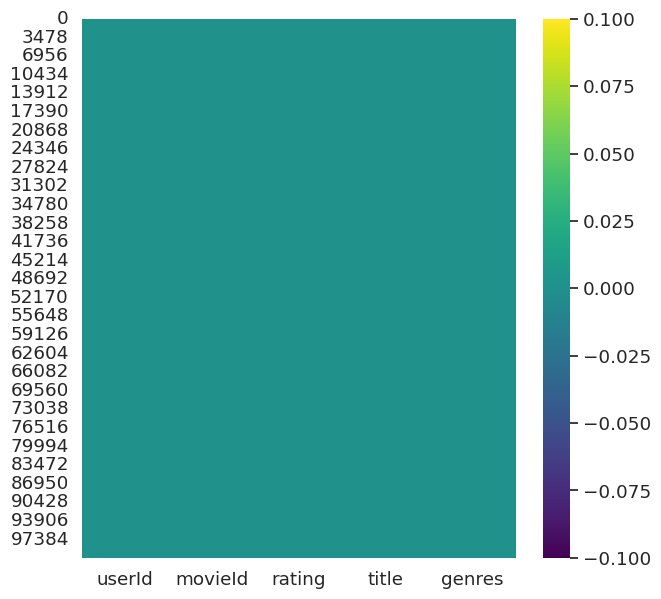

In [24]:
cols =df.columns
sns.heatmap(df[cols].isnull(), cmap='viridis')

In [26]:
df.shape

(100836, 5)

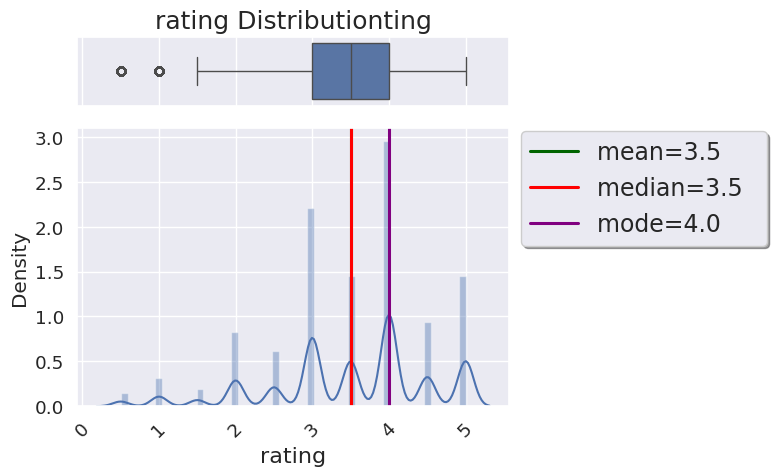

In [25]:
numerical_plotting(df,'rating','rating Distributionting','  ')

In [27]:
df.describe()[['rating']].T

count      mean       std  min  25%  50%  75%  max
rating  100836.0  3.501557  1.042529  0.5  3.0  3.5  4.0  5.0

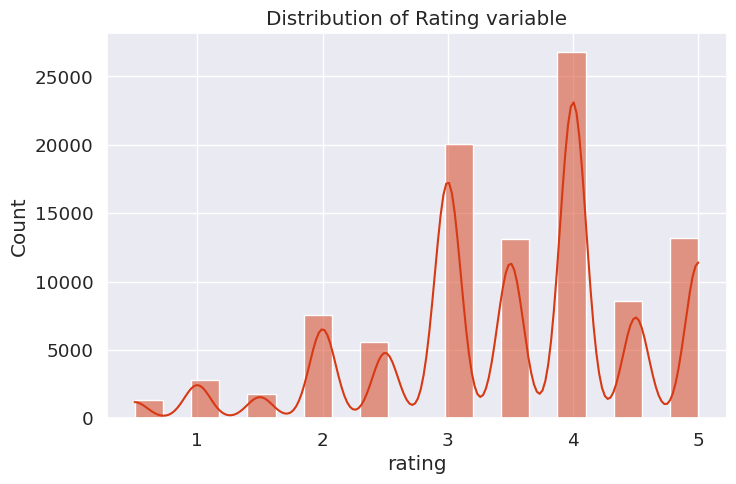

In [28]:
plt.figure(figsize=(8,5))
sns.histplot( x = df["rating"], bins = 20, kde = True, color = "#D63913").set(title = "Distribution of Rating variable");

In [29]:
df

userId  movieId  rating                             title  \
0            1        1     4.0                  Toy Story (1995)   
1            5        1     4.0                  Toy Story (1995)   
2            7        1     4.5                  Toy Story (1995)   
3           15        1     2.5                  Toy Story (1995)   
4           17        1     4.5                  Toy Story (1995)   
...        ...      ...     ...                               ...   
100831     610   160341     2.5                  Bloodmoon (1997)   
100832     610   160527     4.5  Sympathy for the Underdog (1971)   
100833     610   160836     3.0                     Hazard (2005)   
100834     610   163937     3.5                Blair Witch (2016)   
100835     610   163981     3.5                         31 (2016)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1       Adventure|Animation|Children|Comedy|Fantasy  
2       Adventure|Animation|Children|Comedy|Fantasy  
3       Adventure|Animation|Children|Comedy|Fantasy  
4       Adventure|Animation|Children|Comedy|Fantasy  
...                                             ...  
100831                              Action|Thriller  
100832                           Action|Crime|Drama  
100833                        Action|Drama|Thriller  
100834                              Horror|Thriller  
100835                                       Horror  

[100836 rows x 5 columns]

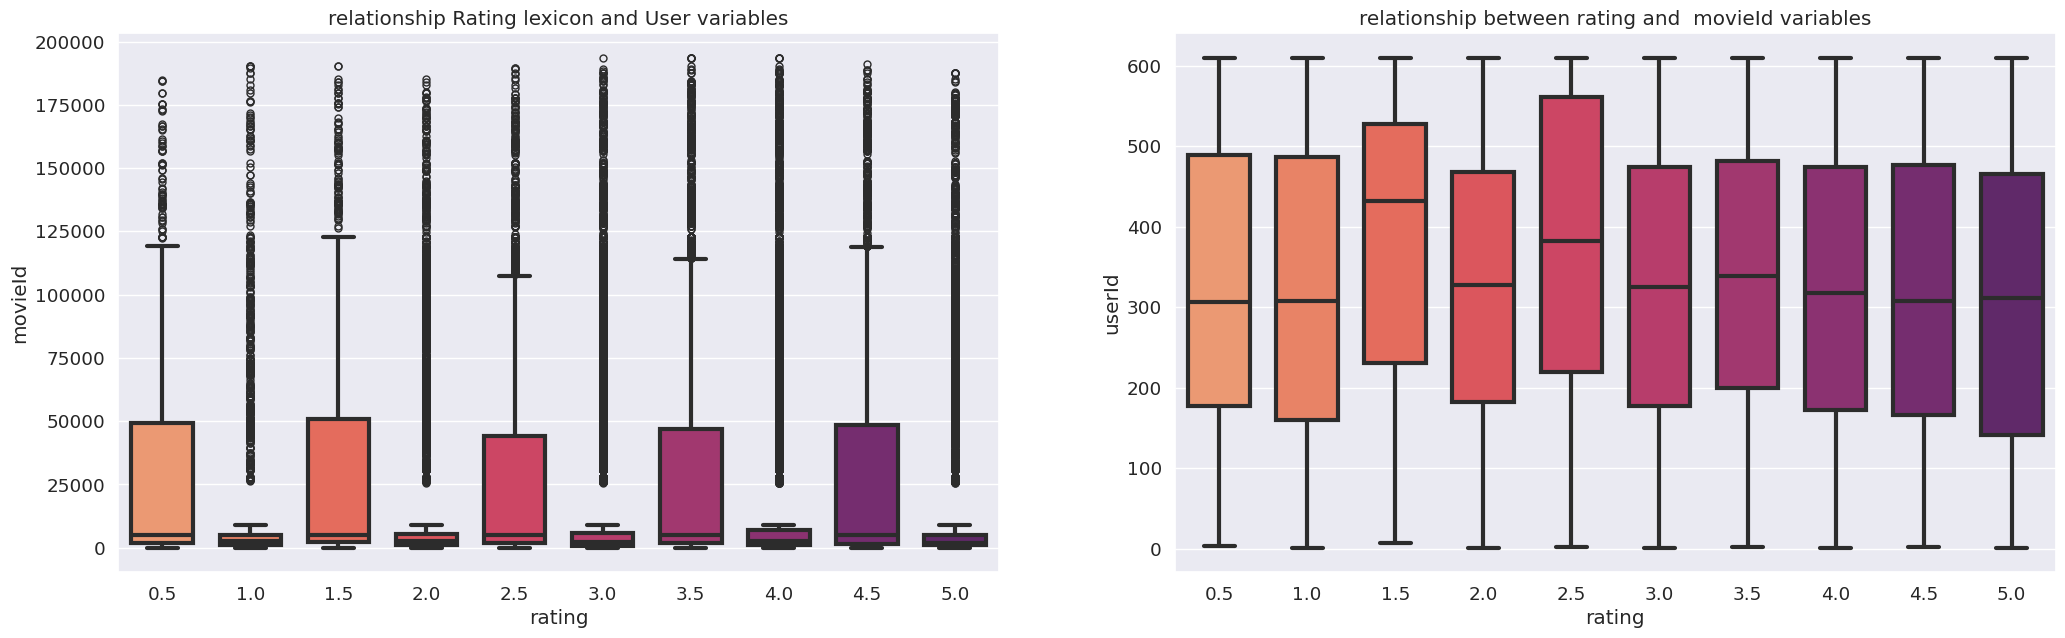

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (25, 7))
sns.boxplot(ax = axes[0], x = "rating", y = "movieId", data = df, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare');
axes[1].set_title("relationship between rating and  movieId variables");

sns.boxplot(ax = axes[1], x = "rating", y = "userId", data = df, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')
axes[0].set_title("relationship Rating lexicon and User variables");

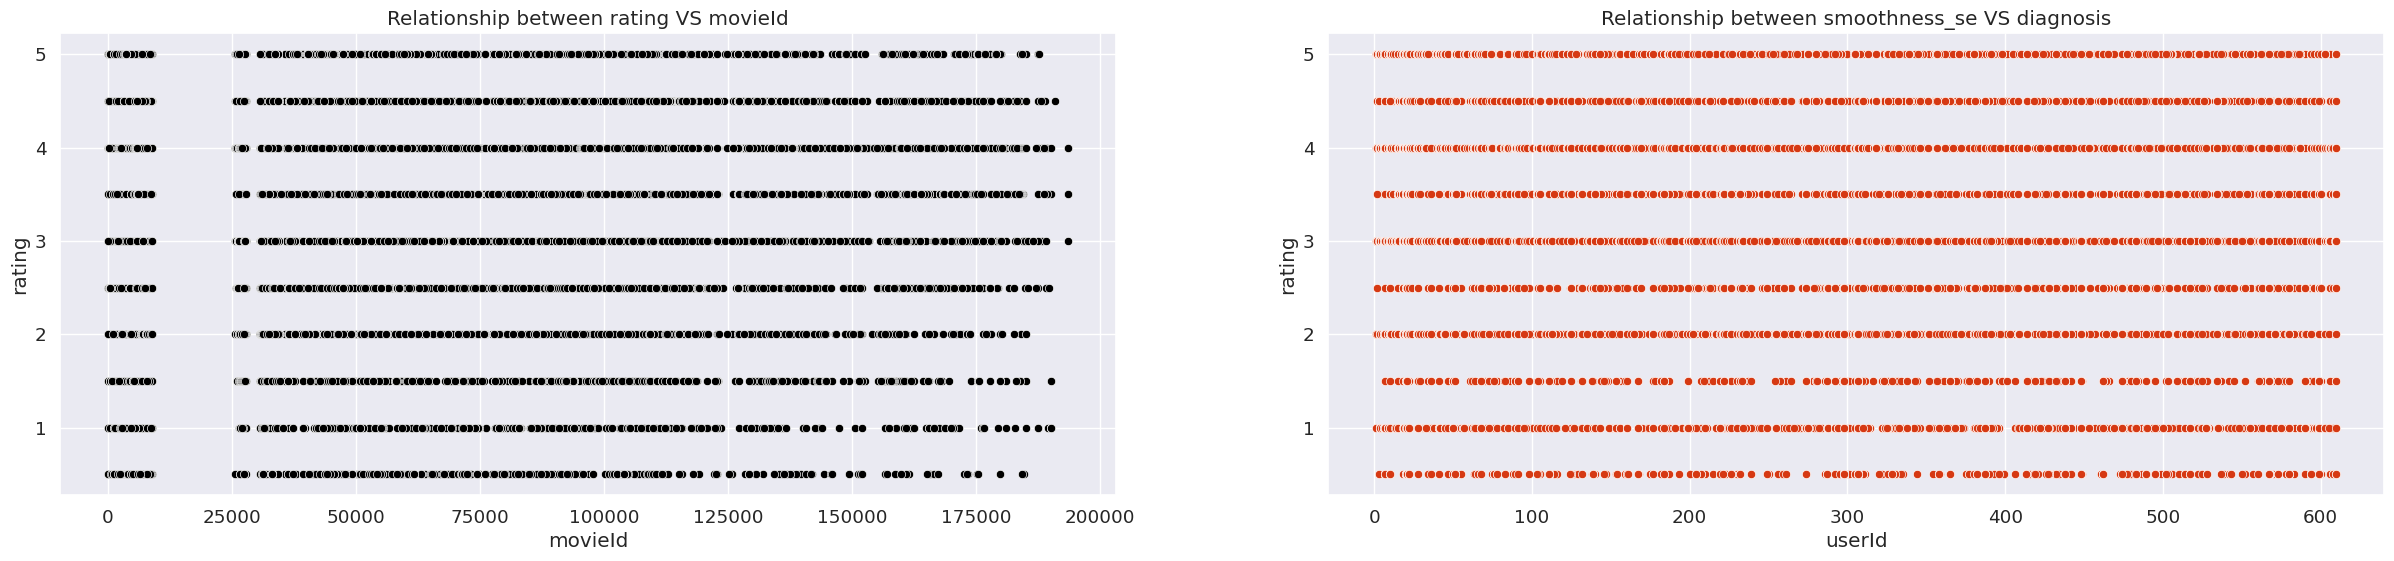

In [31]:
fig, axes = plt.subplots(1, 2, figsize = (30, 6))
axes = axes.flatten()
sns.scatterplot(ax = axes[0], x = "movieId", y = "rating", data = df, color = "#000000"
                ).set(title = "Relationship between rating VS movieId");

sns.scatterplot(ax = axes[1], x = "userId", y = "rating", data = df,
                color = "#D63913").set(title = "Relationship between smoothness_se VS diagnosis");

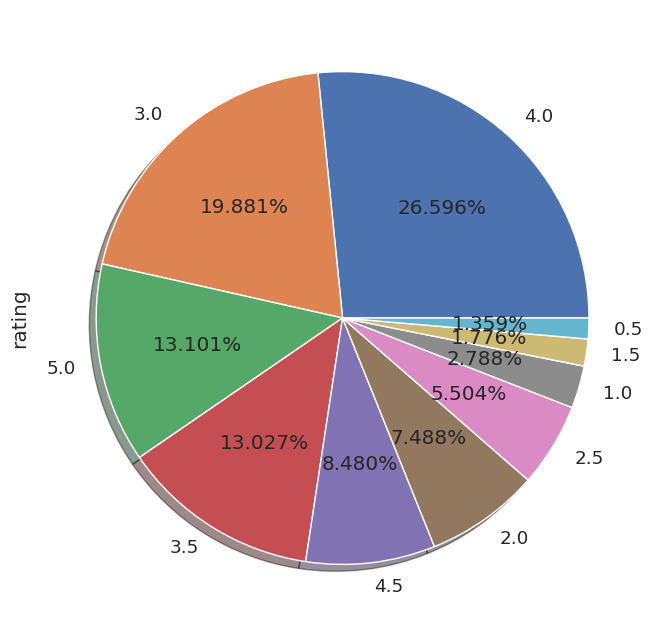

In [32]:
plt.figure(figsize = [8, 8], clear = True, )
df["rating"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

In [33]:
df['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [34]:
df['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

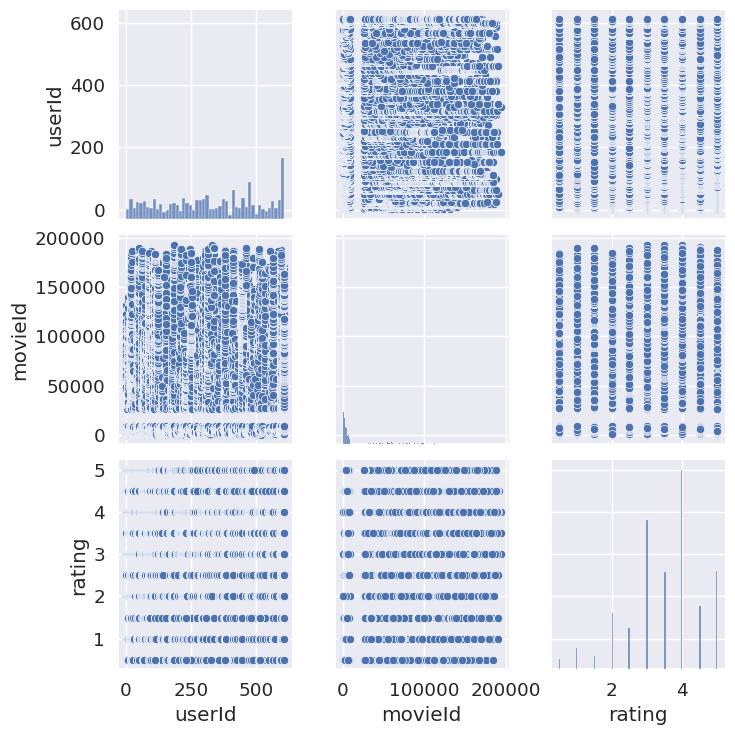

In [35]:
sns.pairplot(df)

In [36]:
df.corr()

userId   movieId    rating
userId   1.000000  0.006773 -0.049348
movieId  0.006773  1.000000 -0.004061
rating  -0.049348 -0.004061  1.000000

<Axes: >

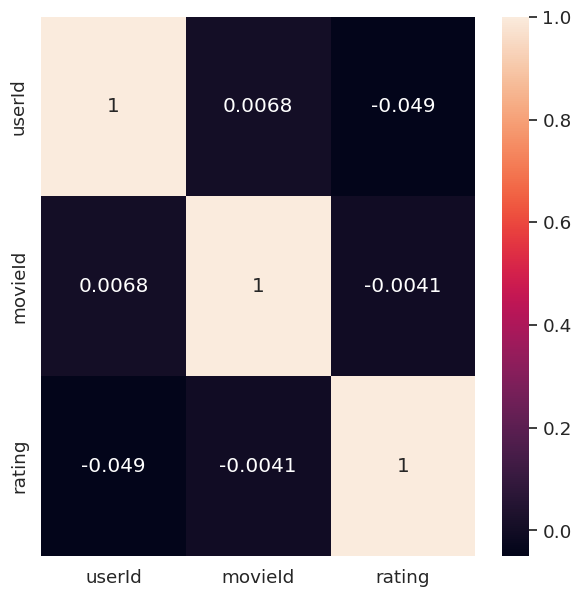

In [37]:
sns.heatmap(df.corr(),annot=True)

In [38]:
movies_rating_counts = df.groupby('title')['rating'].count().reset_index().rename(columns={'rating':'count'})
movies_rating_counts

title  count
0                                    '71 (2014)      1
1       'Hellboy': The Seeds of Creation (2004)      1
2                        'Round Midnight (1986)      2
3                           'Salem's Lot (2004)      1
4                     'Til There Was You (1997)      2
...                                         ...    ...
9714                            eXistenZ (1999)     22
9715                                 xXx (2002)     24
9716             xXx: State of the Union (2005)      5
9717                      ¡Three Amigos! (1986)     26
9718  À nous la liberté (Freedom for Us) (1931)      1

[9719 rows x 2 columns]

In [39]:
final=pd.merge(df,movies_rating_counts,on='title',how='left')
final

userId  movieId  rating                             title  \
0            1        1     4.0                  Toy Story (1995)   
1            5        1     4.0                  Toy Story (1995)   
2            7        1     4.5                  Toy Story (1995)   
3           15        1     2.5                  Toy Story (1995)   
4           17        1     4.5                  Toy Story (1995)   
...        ...      ...     ...                               ...   
100831     610   160341     2.5                  Bloodmoon (1997)   
100832     610   160527     4.5  Sympathy for the Underdog (1971)   
100833     610   160836     3.0                     Hazard (2005)   
100834     610   163937     3.5                Blair Witch (2016)   
100835     610   163981     3.5                         31 (2016)   

                                             genres  count  
0       Adventure|Animation|Children|Comedy|Fantasy    215  
1       Adventure|Animation|Children|Comedy|Fantasy    215  
2       Adventure|Animation|Children|Comedy|Fantasy    215  
3       Adventure|Animation|Children|Comedy|Fantasy    215  
4       Adventure|Animation|Children|Comedy|Fantasy    215  
...                                             ...    ...  
100831                              Action|Thriller      1  
100832                           Action|Crime|Drama      1  
100833                        Action|Drama|Thriller      1  
100834                              Horror|Thriller      1  
100835                                       Horror      1  

[100836 rows x 6 columns]

<Axes: xlabel='count'>

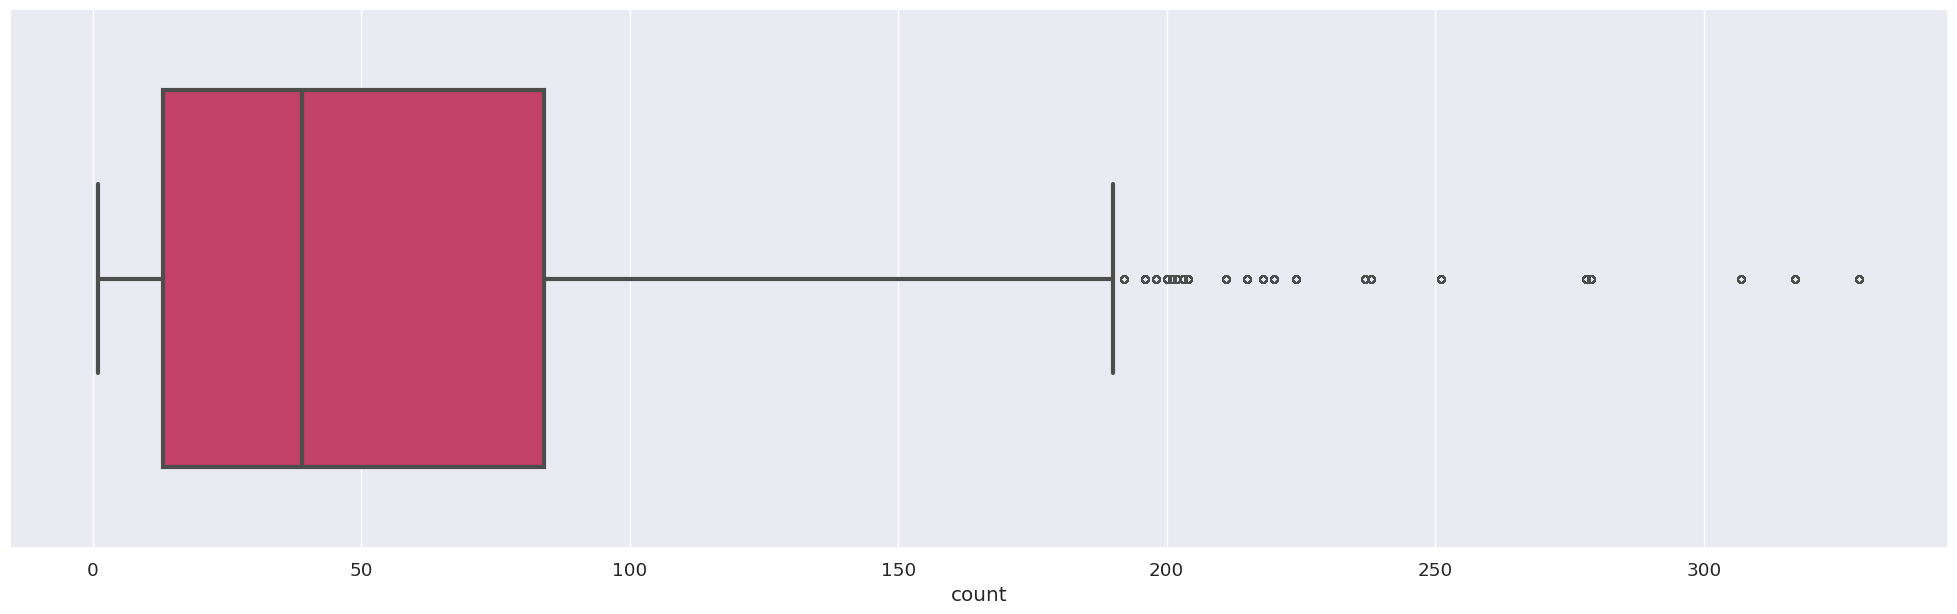

In [40]:
fig, axes = plt.subplots(1, 1, figsize = (25, 7))
sns.boxplot( x = "count",  data = final, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')



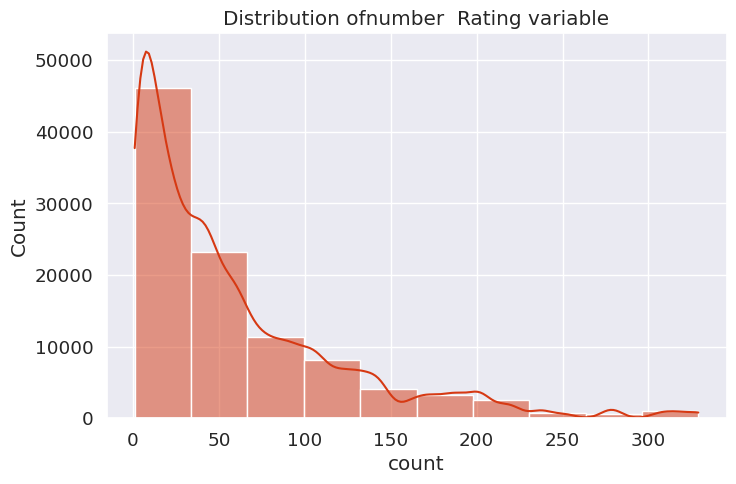

In [41]:
plt.figure(figsize=(8,5))
sns.histplot( x = final["count"], bins = 10, kde = True, color = "#D63913").set(title = "Distribution ofnumber  Rating variable");

In [42]:
#get threshould
for i in range(0,101,10):
    print('{}th the Percentail value is {}'.format(i,final['count'].quantile(i/100)))

0th the Percentail value is 1.0
10th the Percentail value is 4.0
20th the Percentail value is 10.0
30th the Percentail value is 17.0
40th the Percentail value is 27.0
50th the Percentail value is 39.0
60th the Percentail value is 52.0
70th the Percentail value is 69.0
80th the Percentail value is 100.0
90th the Percentail value is 143.0
100th the Percentail value is 329.0


In [43]:
#i will chose threshould 69
final[final['count']>=69]

userId  movieId  rating                 title  \
0           1        1     4.0      Toy Story (1995)   
1           5        1     4.0      Toy Story (1995)   
2           7        1     4.5      Toy Story (1995)   
3          15        1     2.5      Toy Story (1995)   
4          17        1     4.5      Toy Story (1995)   
...       ...      ...     ...                   ...   
74478     594     1393     5.0  Jerry Maguire (1996)   
74479     599     1393     4.0  Jerry Maguire (1996)   
74480     600     1393     3.5  Jerry Maguire (1996)   
74481     606     1393     3.5  Jerry Maguire (1996)   
74482     608     1393     3.0  Jerry Maguire (1996)   

                                            genres  count  
0      Adventure|Animation|Children|Comedy|Fantasy    215  
1      Adventure|Animation|Children|Comedy|Fantasy    215  
2      Adventure|Animation|Children|Comedy|Fantasy    215  
3      Adventure|Animation|Children|Comedy|Fantasy    215  
4      Adventure|Animation|Children|Comedy|Fantasy    215  
...                                            ...    ...  
74478                                Drama|Romance     85  
74479                                Drama|Romance     85  
74480                                Drama|Romance     85  
74481                                Drama|Romance     85  
74482                                Drama|Romance     85  

[30554 rows x 6 columns]

In [44]:
threshould = 69
final_df_rating=final.query('count>=@threshould')
final_df_rating

userId  movieId  rating                 title  \
0           1        1     4.0      Toy Story (1995)   
1           5        1     4.0      Toy Story (1995)   
2           7        1     4.5      Toy Story (1995)   
3          15        1     2.5      Toy Story (1995)   
4          17        1     4.5      Toy Story (1995)   
...       ...      ...     ...                   ...   
74478     594     1393     5.0  Jerry Maguire (1996)   
74479     599     1393     4.0  Jerry Maguire (1996)   
74480     600     1393     3.5  Jerry Maguire (1996)   
74481     606     1393     3.5  Jerry Maguire (1996)   
74482     608     1393     3.0  Jerry Maguire (1996)   

                                            genres  count  
0      Adventure|Animation|Children|Comedy|Fantasy    215  
1      Adventure|Animation|Children|Comedy|Fantasy    215  
2      Adventure|Animation|Children|Comedy|Fantasy    215  
3      Adventure|Animation|Children|Comedy|Fantasy    215  
4      Adventure|Animation|Children|Comedy|Fantasy    215  
...                                            ...    ...  
74478                                Drama|Romance     85  
74479                                Drama|Romance     85  
74480                                Drama|Romance     85  
74481                                Drama|Romance     85  
74482                                Drama|Romance     85  

[30554 rows x 6 columns]

In [45]:
Movies_pav = final_df_rating.pivot_table(index='userId',values='rating',columns='title')
Movies_pav

title   2001: A Space Odyssey (1968)  300 (2007)  \
userId                                             
1                                NaN         NaN   
2                                NaN         NaN   
3                                NaN         NaN   
4                                NaN         NaN   
5                                NaN         NaN   
...                              ...         ...   
606                              5.0         NaN   
607                              NaN         NaN   
608                              3.0         5.0   
609                              NaN         NaN   
610                              4.5         4.0   

title   40-Year-Old Virgin, The (2005)  Ace Ventura: Pet Detective (1994)  \
userId                                                                      
1                                  NaN                                NaN   
2                                  NaN                                NaN   
3                                  NaN                                NaN   
4                                  NaN                                NaN   
5                                  NaN                                3.0   
...                                ...                                ...   
606                                NaN                                NaN   
607                                NaN                                NaN   
608                                NaN                                3.5   
609                                NaN                                NaN   
610                                4.5                                3.0   

title   Ace Ventura: When Nature Calls (1995)  Addams Family Values (1993)  \
userId                                                                       
1                                         NaN                          NaN   
2                                         NaN                          NaN   
3                                         NaN                          NaN   
4                                         NaN                          NaN   
5                                         NaN                          3.0   
...                                       ...                          ...   
606                                       2.0                          NaN   
607                                       NaN                          NaN   
608                                       2.0                          2.5   
609                                       NaN                          NaN   
610                                       NaN                          NaN   

title   Airplane! (1980)  Aladdin (1992)  Alien (1979)  Aliens (1986)  ...  \
userId                                                                 ...   
1                    NaN             NaN           4.0            NaN  ...   
2                    NaN             NaN           NaN            NaN  ...   
3                    NaN             NaN           NaN            NaN  ...   
4                    5.0             4.0           NaN            NaN  ...   
5                    NaN             4.0           NaN            NaN  ...   
...                  ...             ...           ...            ...  ...   
606                  NaN             NaN           4.0            3.5  ...   
607                  4.0             NaN           3.0            NaN  ...   
608                  NaN             3.0           4.0            4.5  ...   
609                  NaN             NaN           NaN            NaN  ...   
610                  3.5             NaN           4.5            5.0  ...   

title   Waterworld (1995)  What's Eating Gilbert Grape (1993)  \
userId                                                          
1                     NaN                                 NaN   
2                     NaN                                 NaN   
3                     NaN      

In [46]:
Movies_pav['Toy Story (1995)']

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      4.0
      ... 
606    2.5
607    4.0
608    2.5
609    3.0
610    5.0
Name: Toy Story (1995), Length: 602, dtype: float64

In [47]:
similarity= Movies_pav.corrwith(Movies_pav['Toy Story (1995)'])
similarity

title
2001: A Space Odyssey (1968)                  0.014566
300 (2007)                                    0.206164
40-Year-Old Virgin, The (2005)                0.193879
Ace Ventura: Pet Detective (1994)             0.197135
Ace Ventura: When Nature Calls (1995)         0.325865
                                                ...   
Willy Wonka & the Chocolate Factory (1971)    0.332187
Wizard of Oz, The (1939)                      0.302133
X-Men (2000)                                  0.039244
X2: X-Men United (2003)                       0.094793
Young Frankenstein (1974)                     0.087588
Length: 264, dtype: float64

In [48]:
corrlatedFilms=similarity.sort_values(ascending=False).reset_index().rename(columns={0:'corrolation'})
corrlatedFilms

title  corrolation
0                  Toy Story (1995)     1.000000
1                Toy Story 2 (1999)     0.699211
2           Incredibles, The (2004)     0.643301
3               Finding Nemo (2003)     0.618701
4                    Aladdin (1992)     0.611892
..                              ...          ...
259     Natural Born Killers (1994)    -0.091430
260                 Stargate (1994)    -0.124225
261             Office Space (1999)    -0.126314
262  Matrix Revolutions, The (2003)    -0.128442
263                   Casino (1995)    -0.168864

[264 rows x 2 columns]

In [49]:
final_df_rating

userId  movieId  rating                 title  \
0           1        1     4.0      Toy Story (1995)   
1           5        1     4.0      Toy Story (1995)   
2           7        1     4.5      Toy Story (1995)   
3          15        1     2.5      Toy Story (1995)   
4          17        1     4.5      Toy Story (1995)   
...       ...      ...     ...                   ...   
74478     594     1393     5.0  Jerry Maguire (1996)   
74479     599     1393     4.0  Jerry Maguire (1996)   
74480     600     1393     3.5  Jerry Maguire (1996)   
74481     606     1393     3.5  Jerry Maguire (1996)   
74482     608     1393     3.0  Jerry Maguire (1996)   

                                            genres  count  
0      Adventure|Animation|Children|Comedy|Fantasy    215  
1      Adventure|Animation|Children|Comedy|Fantasy    215  
2      Adventure|Animation|Children|Comedy|Fantasy    215  
3      Adventure|Animation|Children|Comedy|Fantasy    215  
4      Adventure|Animation|Children|Comedy|Fantasy    215  
...                                            ...    ...  
74478                                Drama|Romance     85  
74479                                Drama|Romance     85  
74480                                Drama|Romance     85  
74481                                Drama|Romance     85  
74482                                Drama|Romance     85  

[30554 rows x 6 columns]

In [50]:
rat=final_df_rating.groupby('title').agg({'title':'count','rating':'mean'}).rename(columns={'title':'count','rating':'rating'}).reset_index()
rat

title  count    rating
0                  2001: A Space Odyssey (1968)    109  3.894495
1                                    300 (2007)     80  3.681250
2                40-Year-Old Virgin, The (2005)     74  3.547297
3             Ace Ventura: Pet Detective (1994)    161  3.040373
4         Ace Ventura: When Nature Calls (1995)     88  2.727273
..                                          ...    ...       ...
259  Willy Wonka & the Chocolate Factory (1971)    119  3.873950
260                    Wizard of Oz, The (1939)     92  3.880435
261                                X-Men (2000)    133  3.699248
262                     X2: X-Men United (2003)     76  3.723684
263                   Young Frankenstein (1974)     69  3.992754

[264 rows x 3 columns]

In [51]:
recomend=pd.merge(rat,corrlatedFilms,on='title')
recomend

title  count    rating  corrolation
0                  2001: A Space Odyssey (1968)    109  3.894495     0.014566
1                                    300 (2007)     80  3.681250     0.206164
2                40-Year-Old Virgin, The (2005)     74  3.547297     0.193879
3             Ace Ventura: Pet Detective (1994)    161  3.040373     0.197135
4         Ace Ventura: When Nature Calls (1995)     88  2.727273     0.325865
..                                          ...    ...       ...          ...
259  Willy Wonka & the Chocolate Factory (1971)    119  3.873950     0.332187
260                    Wizard of Oz, The (1939)     92  3.880435     0.302133
261                                X-Men (2000)    133  3.699248     0.039244
262                     X2: X-Men United (2003)     76  3.723684     0.094793
263                   Young Frankenstein (1974)     69  3.992754     0.087588

[264 rows x 4 columns]

In [52]:
recomend.sort_values(by='corrolation',ascending=False)[1:11]

title  count    rating  corrolation
242                   Toy Story 2 (1999)     97  3.860825     0.699211
127              Incredibles, The (2004)    125  3.836000     0.643301
91                   Finding Nemo (2003)    141  3.960993     0.618701
7                         Aladdin (1992)    183  3.792350     0.611892
84                Erin Brockovich (2000)     70  3.528571     0.598016
200             Santa Clause, The (1994)     81  3.203704     0.569712
58   City of God (Cidade de Deus) (2002)     75  4.146667     0.521231
70                           Dave (1993)     76  3.546053     0.507150
166                Monsters, Inc. (2001)    132  3.871212     0.490231
159                      Maverick (1994)     74  3.500000     0.472626

In [53]:
final_df_rating

userId  movieId  rating                 title  \
0           1        1     4.0      Toy Story (1995)   
1           5        1     4.0      Toy Story (1995)   
2           7        1     4.5      Toy Story (1995)   
3          15        1     2.5      Toy Story (1995)   
4          17        1     4.5      Toy Story (1995)   
...       ...      ...     ...                   ...   
74478     594     1393     5.0  Jerry Maguire (1996)   
74479     599     1393     4.0  Jerry Maguire (1996)   
74480     600     1393     3.5  Jerry Maguire (1996)   
74481     606     1393     3.5  Jerry Maguire (1996)   
74482     608     1393     3.0  Jerry Maguire (1996)   

                                            genres  count  
0      Adventure|Animation|Children|Comedy|Fantasy    215  
1      Adventure|Animation|Children|Comedy|Fantasy    215  
2      Adventure|Animation|Children|Comedy|Fantasy    215  
3      Adventure|Animation|Children|Comedy|Fantasy    215  
4      Adventure|Animation|Children|Comedy|Fantasy    215  
...                                            ...    ...  
74478                                Drama|Romance     85  
74479                                Drama|Romance     85  
74480                                Drama|Romance     85  
74481                                Drama|Romance     85  
74482                                Drama|Romance     85  

[30554 rows x 6 columns]

In [54]:
pivote_table  =final_df_rating.pivot_table(index='title',values='rating',columns='userId').fillna(0)
pivote_table

userId                                      1    2    3    4    5    6    7    \
title                                                                           
2001: A Space Odyssey (1968)                0.0  0.0  0.0  0.0  0.0  0.0  4.0   
300 (2007)                                  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
40-Year-Old Virgin, The (2005)              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Ace Ventura: Pet Detective (1994)           0.0  0.0  0.0  0.0  3.0  3.0  0.0   
Ace Ventura: When Nature Calls (1995)       0.0  0.0  0.0  0.0  0.0  2.0  0.0   
...                                         ...  ...  ...  ...  ...  ...  ...   
Willy Wonka & the Chocolate Factory (1971)  5.0  0.0  0.0  4.0  0.0  3.0  0.0   
Wizard of Oz, The (1939)                    5.0  0.0  0.0  5.0  0.0  0.0  0.0   
X-Men (2000)                                5.0  0.0  0.0  0.0  0.0  0.0  3.5   
X2: X-Men United (2003)                     0.0  0.0  0.0  0.0  0.0  0.0  4.0   
Young Frankenstein (1974)                   5.0  0.0  0.0  0.0  0.0  0.0  0.0   

userId                                      8    9    10   ...  601  602  603  \
title                                                      ...                  
2001: A Space Odyssey (1968)                0.0  0.0  0.0  ...  0.0  0.0  5.0   
300 (2007)                                  0.0  0.0  3.0  ...  0.0  0.0  0.0   
40-Year-Old Virgin, The (2005)              0.0  0.0  0.0  ...  0.0  0.0  0.0   
Ace Ventura: Pet Detective (1994)           0.0  0.0  0.0  ...  0.0  2.0  0.0   
Ace Ventura: When Nature Calls (1995)       0.0  0.0  0.0  ...  0.0  2.0  0.0   
...                                         ...  ...  ...  ...  ...  ...  ...   
Willy Wonka & the Chocolate Factory (1971)  0.0  0.0  0.0  ...  0.0  0.0  3.0   
Wizard of Oz, The (1939)                    0.0  0.0  0.0  ...  0.0  0.0  5.0   
X-Men (2000)                                0.0  0.0  0.0  ...  0.0  0.0  0.0   
X2: X-Men United (2003)                     0.0  0.0  0.0  ...  0.0  0.0  0.0   
Young Frankenstein (1974)                   0.0  0.0  0.0  ...  0.0  0.0  5.0   

userId                                      604  605  606  607  608  609  610  
title                                                                          
2001: A Space Odyssey (1968)                0.0  0.0  5.0  0.0  3.0  0.0  4.5  
300 (2007)                                  0.0  3.0  0.0  0.0  5.0  0.0  4.0  
40-Year-Old Virgin, The (2005)              0.0  0.0  0.0  0.0  0.0  0.0  4.5  
Ace Ventura: Pet Detective (1994)           2.0  0.0  0.0  0.0  3.5  0.0  3.0  
Ace Ventura: When Nature Calls (1995)       1.0  0.0  2.0  0.0  2.0  0.0  0.0  
...                                         ...  ...  ...  ...  ...  ...  ...  
Willy Wonka & the Chocolate Factory (1971)  0.0  4.0  0.0  0.0  3.5  0.0  0.0  
Wizard of Oz, The (1939)                    0.0  2.0  0.0  5.0  2.5  0.0  3.5  
X-Men (2000)                                0.0  0.0  0.0  3.0  4.0  0.0  3.5  
X2: X-Men United (2003)                     0.0  0.0  0.0  0.0  4.0  0.0  4.0  
Young Frankenstein (1974)                   0.0  0.0  3.5  0.0  0.0  0.0  0.0  

[264 rows x 602 columns]

In [55]:
#conver table to array
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [56]:
matrix = csr_matrix(pivote_table.values)
model = NearestNeighbors (metric = 'cosine',algorithm='brute')
model.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [57]:
pivote_table.shape

(264, 602)

In [58]:
query_index = np.random.choice(pivote_table.shape[0])
query_index

5

In [59]:
pivote_table.index[225]

'Star Trek: Generations (1994)'

In [60]:
#get movies and destance
distance , indices  = model.kneighbors(pivote_table.iloc[query_index,:].values.reshape(1,-1),n_neighbors=10)

In [61]:
#get recomending films
for i in range(0,len(distance.flatten())):
    if i== 0 :
         print('Recommendations for {0}:\n'.format(pivote_table.index[query_index]))
    else:
        print('{0}: {1} :'.format(i, pivote_table.index[indices.flatten()[i]]))


Recommendations for Addams Family Values (1993):

1: Batman Forever (1995) :
2: Ace Ventura: Pet Detective (1994) :
3: Mrs. Doubtfire (1993) :
4: Batman (1989) :
5: Interview with the Vampire: The Vampire Chronicles (1994) :
6: Mask, The (1994) :
7: Star Trek: Generations (1994) :
8: Nightmare Before Christmas, The (1993) :
9: Waterworld (1995) :
